In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['TSLA']
start_date = '2024-06-15'
end_date = '2024-06-22'
date_range = pd.date_range(start=start_date, end=end_date)

stock_data = {}
features_data = {}
stochastic_data = {}

for stock in tickers:
    stock_data[stock] = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data['TSLA']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-17,177.919998,188.809998,177.000000,187.440002,187.440002,109786100
2024-06-18,186.559998,187.199997,182.369995,184.860001,184.860001,68982300
2024-06-20,184.679993,185.210007,179.660004,181.570007,181.570007,55893100
2024-06-21,182.300003,183.949997,180.690002,183.009995,183.009995,63029500


In [4]:
for stock in tickers:
  ema_12 = stock_data[stock]['Adj Close'].ewm(span = 12).mean()
  ema_26 = stock_data[stock]['Adj Close'].ewm(span = 26).mean()
  ema_9 = stock_data[stock]['Adj Close'].ewm(span = 9).mean()
  macd_data = ema_12 - ema_26
  low_value = (stock_data[stock]['Adj Close']).min()
  high_value = stock_data[stock]['Adj Close'].max()
  features_data[stock] = (stock_data[stock]['Adj Close'] - stock_data[stock]['Adj Close'].shift(1)) / stock_data[stock]['Adj Close'].shift(1) # percent difference
  stochastic_data[stock] = ((stock_data[stock]['Adj Close'] - low_value) / (high_value-low_value)) * 100 #stochastic line

  # if(macd_data['2024-06-21'] > ema_9['2024-06-21']): # bullish crossover
    # features_data[stock] = (stock_data[stock]['Adj Close'] - stock_data[stock]['Adj Close'].shift(1)) / stock_data[stock]['Adj Close'].shift(1) # percent difference
    #stochastic_data[stock] = ((stock_data[stock]['Adj Close'] - low_value) / (high_value-low_value)) * 100 #stochastic line

In [5]:
macd_data
stochastic_data

{'TSLA': Date
 2024-06-17    100.000000
 2024-06-18     56.047632
 2024-06-20      0.000000
 2024-06-21     24.531318
 Name: Adj Close, dtype: float64}

TSLA


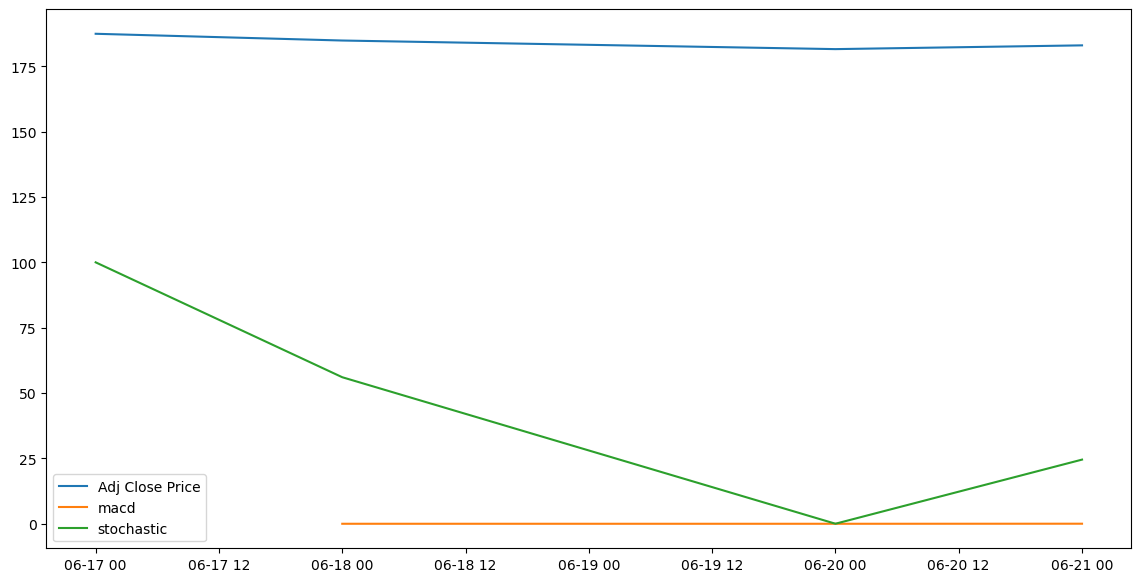

In [6]:
for stock in tickers:
    print(stock)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock]['Adj Close'], label='Adj Close Price')
    plt.plot(features_data[stock], label = 'macd')
    plt.plot(stochastic_data[stock], label = 'stochastic')
    plt.legend()
    plt.show()